In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [149]:
%matplotlib inline

# Deal with data

## Import dataframe

In [150]:
pd.set_option('display.max_columns',None)

In [151]:
df = pd.read_csv('fifa21_train.csv')
display(df.head())
df.shape

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


(11701, 101)

In [152]:
# Save the initial length of the dataframe
len0 = len(df)

In [153]:
list(df.columns)

['ID',
 'Name',
 'Age',
 'Nationality',
 'Club',
 'BP',
 'Position',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM'

## Standardize Headers

In [154]:
def stHead(df):
    new_header = []
    for h in df.columns:
        x = h.lower().replace(' ','_')
        new_header.append(x)
    df.columns = new_header
    display(df)

In [155]:
stHead(df)

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,Left,5,"Feb 8, 2018",NaN,€625K,€3K,€891K,2018 ~ 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3 ★,2★,Medium

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11701 entries, 0 to 11700
Columns: 101 entries, id to ova
dtypes: float64(10), int64(43), object(48)
memory usage: 9.0+ MB


In [157]:
df.describe()

,id,age,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,ova
count,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11660.000000,11701.000000,11701.000000,11660.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11660.000000,11701.000000,11660.000000,11701.000000,11701.000000,11660.000000,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11694.000000,11694.000000,11660.000000,11701.000000,11422.000000,11701.000000,11701.000000,11701.000000,11660.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,219436.649004,25.27049,5.534655,258.482181,51.593795,48.048116,53.494060,60.436800,45.067324,266.497222,57.852491,49.617839,44.358260,54.214683,60.627810,322.617383,65.432527,65.446628,64.582075,62.899838,64.709348,302.083326,59.726348,65.036621,63.214939,65.17084,49.162465,261.704982,56.939065,46.815119,52.485890,55.439194,50.279378,59.947732,140.674558,46.964875,48.042560,45.827702,77.726946,15.604906,15.517734,15.494402,15.543458,15.768310,1629.786599,361.106316,68.095206,55.046406,58.893257,64.223229,50.030254,64.817964,66.921972
std,37480.006004,4.95764,5.810903,72.267012,17.872747,19.399617,16.956195,13.971811,17.732902,76.835287,18.050938,18.180408,17.484142,14.886875,15.886688,55.330054,14.735329,14.516404,14.484351,9.020199,14.131318,49.697749,13.511767,12.017118,15.350014,12.76541,19.058991,62.935298,17.066535,20.808153,19.069465,13.695285,15.713965,11.769872,61.599006,20.190466,21.470841,21.217062,81.221525,16.850815,16.155245,16.005114,16.409881,17.151738,260.766470,40.318331,11.247282,13.851853,10.174939,9.818311,16.841283,9.757873,6.876081
min,27.000000,16.00000,-1.000000,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,13.000000,11.000000,14.000000,24.000000,17.000000,133.000000,12.000000,25.000000,12.000000,20.00000,4.000000,55.000000,9.000000,5.000000,2.000000,10.000000,8.000000,12.000000,17.000000,3.000000,6.000000,6.000000,12.000000,1.000000,2.000000,2.000000,2.000000,1.000000,731.000000,228.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,38.000000
25%,204060.000000,21.00000,0.000000,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.000000,59.000000,57.000000,57.000000,57.000000,271.000000,50.000000,58.000000,56.000000,58.00000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000,53.000000,83.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1490.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000
50%,229040.000000,25.00000,4.000000,271.000000,56.000000,52.000000,56.000000,63.000000,47.000000,279.000000,63.000000,52.000000,43.000000,57.000000,64.000000,331.000000,68.000000,68.000000,67.000000,63.000000,67.000000,308.000000,61.000000,66.000000,66.000000,66.00000,54.000000,269.000000,60.000000,52.000000,57.000000,57.000000,51.000000,61.000000,156.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,59.000000,65.000000,53.000000,66.000000,67.000000
75%,244176.000000,29.00000,10.000000,306.000000,65.000000,64.000000,65.000000,69.000000,59.000000,319.000000,70.000000,64.000000,58.00

## Identify numerical and categorical variables

In [158]:
list(df.dtypes)

[dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dt

In [159]:
# Show a data frame with the numerical data
df._get_numeric_data()

,id,age,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,ova
0,184383,26,1,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,69,51,63,63,51,60,64
1,188044,30,0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,83,75,68,82,33,71,77
2,184431,33,0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,80,77,78,86,27,56,80
3,233796,22,13,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,57,44,54,57,57,60,59
4,234799,23,8,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,25,5,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,75,28,56,59,60,69,65
11697,214680,27,4,84,12,14,13,29,16.0,96,17,15.0,19,27,18,237,40,40,38.0,65,54.0,217,50,59.0,29,64,15,101,30,22.0,15.0,15.0,19,56.0,41,12,16,13.0,347,72,67,66,70,72,1123,387,72,67,66,72,40,70,70
11698,221489,22,8,286,64,66,51,64,41.0,291,71,57.0,38,58,67,388,77,76,86.0,62,87.0,278,61,71.0,64,37,45,241,27,25.0,66.0,58.0,65,58.0,62,37,12,13.0,57,13,10,11,7,16,1603,337,76,60,60,72,26,43,67
11699,146717,26,7,254,64,66,51,73,NaN,284,74,NaN,63,72,75,198,71,72,NaN,55,NaN,258,61,NaN,71,64,62,241,64,61.0,63.0,NaN,53,NaN,113,55,58,NaN,81,9,24,72,24,24,1429,400,72,63,70,72,57,66,68


### Drop id column

In [160]:
# Id column does not provide any information at all. Even tough it has numeric data type, it is categorical.
df.drop(columns='id',inplace=True)

In [161]:
numeCols = list(df._get_numeric_data().columns)
numeCols

['age',
 'growth',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 'ova']

In [162]:
# Show a data frame with the categorical features
df.select_dtypes('object')

,name,nationality,club,bp,position,team_&_contract,height,weight,foot,joined,loan_date_end,value,wage,release_clause,contract,w/f,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,4 ★,2★,High,Medium,1 ★,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",3 ★,4★,High,Low,2 ★,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,4 ★,4★,High,Medium,2 ★,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,2 ★,2★,Medium,Medium,1 ★,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,2 ★,3★,Low,Medium,1 ★,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,Left,"Feb 8, 2018",NaN,€625K,€3K,€891K,2018 ~ 2021,3 ★,2★,Medium,Medium,1 ★,3,48+2,48+2,48+2,55+0,52+0,52+0,52+0,55+0,54+2,54+2,54+2,58+2,56+2,56+2,56+2,58+2,63+2,60+2,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2
11697,G. Gallon,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,Right,"Jul 1, 2019",NaN,€1.6M,€4K,€2.9M,2019 ~ 2022,2 ★,1★,Medium,Medium,1 ★,3,28+2,28+2,28+2,24+0,26+0,26+0,26+0,24+0,24+2,24+2,24+2,25+2,25+2,25+2,25+2,25+2,25+2,26+2,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2
11698,J. Flores,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,Right,"Jan 23, 2019",NaN,€1.1M,€2K,€1.7M,2019 ~ 2024,3 ★,3★,High,Medium,1 ★,6,62+2,62+2,62+2,67+0,65+0,65+0,65+0,67+0,65+2,65+2,65+2,66+2,58+2,58+2,58+2,66+2,49+2,44+2,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2
11699,Anderson Silva,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,Right,NaN,NaN,€0,€0,€0,2010,3 ★,1★,NaN,NaN,3 ★,3,68+0,68+0,68+0,71+0,68+0,68+0,68+0,71+0,72+0,72+0,72+0,71+0,71+0,71+0,71+0,71+0,66+0,68+0,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0


### Drop the name column

In [163]:
# The name column will not provide ironically any information to our model.
df.drop(columns='name', inplace=True)

In [164]:
cateCols = list(df.select_dtypes('object').columns)
cateCols

['nationality',
 'club',
 'bp',
 'position',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'hits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

In [165]:
#print(df._get_numeric_data().columns)
#print(df.select_dtypes('object').columns)

## Categorical features analysis

In [166]:
# There are some features that seem to be numerical and are show like categorical
# height, weight, joined, loan_date_end, value, wage, release_clause...

In [167]:
possible_nocat_feat = ['height', 'weight', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause', 'w/f', 'sm', 'ir']

In [168]:
# ls	st	rs	lw	lf	cf	rf	rw	lam	cam	ram	lm	lcm	cm	rcm	rm	lwb	ldm	cdm	rdm	rwb	lb	lcb	cb	rcb	rb	gk

In [169]:
df[possible_nocat_feat].head()

,height,weight,joined,loan_date_end,value,wage,release_clause,w/f,sm,ir
0,"5'9""",161lbs,"Jul 1, 2015",NaN,€525K,€4K,€801K,4 ★,2★,1 ★
1,"6'0""",159lbs,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,3 ★,4★,2 ★
2,"5'4""",134lbs,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,4 ★,4★,2 ★
3,"5'10""",152lbs,"Jul 1, 2016",NaN,€275K,€4K,€694K,2 ★,2★,1 ★
4,"5'11""",150lbs,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2 ★,3★,1 ★


### Extract club out of team_&_contrat 

In [170]:
# Drop team_&_contract: After a lot of work team_&_contract is just a duplicated feature

In [171]:
df.drop(columns='team_&_contract',inplace=True)
cateCols.remove('team_&_contract')

In [172]:
# Previous work to drop the columns. There is still a question to be solved

In [173]:
def remove_club(x, club):
    if ( club in x ):
        x = x.replace(club,"").lstrip()
        return x
    else:
        return x

# lambda x, club: x.replace(club,"").lstrip() if (club in x) else x

In [174]:
 # ??? df[['team_&_contract','club']].apply(remove_club) --> pendiente de revisar por Ignacio

### Treat club Nan

In [175]:
df[df['club'].isna()] #==True]

,age,nationality,club,bp,position,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
102,38,Ivory Coast,NaN,ST,ST,"6'2""",176lbs,Right,0,"Jul 27, 2015",NaN,€0,€0,€0,Ivory Coast Free,370,67,82,85,60,76.0,376,74,78.0,84,60,80,327,64,64,63.0,80,56.0,388,85,76.0,62,86,79,363,80,42.0,81.0,76.0,84,80.0,83,22,32,29.0,49,10,11,8,6,14,1956,401,4 ★,3★,Medium,Low,3 ★,64,82,67,74,36,78,20,79+2,79+2,79+2,73+1,76+1,76+1,76+1,73+1,73+2,73+2,73+2,72+2,68+2,68+2,68+2,72+2,55+2,55+2,55+2,55+2,55+2,53+2,53+2,53+2,53+2,53+2,18+2,81
535,34,Germany,NaN,CB,CB,"6'0""",174lbs,Right,0,"Mar 21, 2017",NaN,€0,€0,€0,Germany Free,358,70,65,73,78,72.0,380,70,82.0,70,79,79,263,32,36,53.0,80,62.0,348,73,68.0,60,75,72,370,77,71.0,68.0,80.0,74,87.0,215,73,71,71.0,65,14,14,13,13,11,1999,394,3 ★,3★,Medium,Medium,4 ★,34,69,77,71,72,71,27,69+3,69+3,69+3,67+0,70+0,70+0,70+0,67+0,72+3,72+3,72+3,68+3,75+0,75+0,75+0,68+3,68+3,75+0,75+0,75+0,68+3,68+3,73+2,73+2,73+2,68+3,20+3,75
697,26,India,NaN,ST,ST RM LM,"5'8""",148lbs,Left,1,"Jul 12, 2019",NaN,€0,€0,€0,India Free,232,34,50,52,48,48.0,239,51,45.0,57,30,56,365,77,74,77.0,51,86.0,256,50,74.0,41,47,44,235,47,31.0,54.0,48.0,55,53.0,57,14,29,14.0,49,8,8,10,13,10,1433,297,3 ★,2★,High,Medium,1 ★,75,49,43,57,26,47,6,53+2,53+2,53+2,54+0,54+0,54+0,54+0,54+0,52+2,52+2,52+2,51+2,45+2,45+2,45+2,51+2,40+2,37+2,37+2,37+2,40+2,39+2,36+2,36+2,36+2,39+2,14+2,54
1599,22,United Arab Emirates,NaN,RB,RB,"5'8""",148lbs,Right,8,"Jul 1, 2018",NaN,€0,€0,€0,United Arab Emirates Free,205,51,34,44,49,27.0,215,53,40.0,34,38,50,345,72,73,67.0,53,80.0,237,35,65.0,58,50,29,231,60,51.0,45.0,40.0,35,43.0,157,52,53,52.0,53,9,11,10,14,9,1443,312,3 ★,2★,Medium,Medium,1 ★,73,33,45,55,51,55,8,46+2,46+2,46+2,51+0,48+0,48+0,48+0,51+0,48+2,48+2,48+2,51+2,47+2,47+2,47+2,51+2,54+2,50+2,50+2,50+2,54+2,54+2,52+2,52+2,52+2,54+2,15+2,56
1754,36,France,NaN,CAM,CF ST CAM LW,"6'2""",183lbs,Right,0,"Dec 1, 2014",NaN,€0,€0,€0,France Free,354,63,75,59,78,79.0,383,82,83.0,72,62,84,364,77,72,78.0,81,56.0,333,75,70.0,54,64,70,323,61,23.0,83.0,83.0,73,NaN,76,26,25,25.0,49,10,12,7,10,10,1882,393,4 ★,4★,Medium,Medium,3 ★,74,75,74,81,28,61,22,76+1,76+1,76+1,77+1,78+1,78+1,78+1,77+1,80+-1,80+-1,80+-1,75+1,69+1,69+1,69+1,75+1,54+1,57+1,57+1,57+1,54+1,48+1,45+1,45+1,45+1,48+1,15+1,79
2224,35,Brazil,NaN,CAM,CAM CF,"6'1""",183lbs,Right,0,"Jul 1, 2014",NaN,€0,€0,€0,Brazil Free,365,74,74,52,81,84.0,389,79,84.0,70,73,83,332,63,61,68.0,76,64.0,319,76,53.0,44,70,76,332,45,42.0,77.0,84.0,84,85.0,76,14,31,31.0,19,3,5,5,3,3,1832,383,4 ★,4★,High,Medium,3 ★,62,76,79,78,30,58,21,73+2,73+2,73+2,76+1,77+1,77+1,77+1,76+1,78+2,78+2,78+2,75+2,73+2,73+2,73+2,75+2,55+2,56+2,56+2,56+2,55+2,51+2,45+2,45+2,45+2,51+2,12+2,80
2342,26,India,NaN,LM,LM,"5'7""",143lbs,Left,1,"Sep 3, 2020",NaN,€0,€0,€0,India Free,220,50,40,44,44,42.0,237,57,48.0,35,42,55,327,67,68,65.0,49,78.0,231,51,61.0,45,40,34,174,32,15.0,50.0,46.0,31,47.0,58,28,14,16.0,46,8,6,12,14,6,1293,275,3 ★,2★,Medium,Medium,1 ★,68,41,45,58,22,41,3,49+2,49+2,49+2,52+0,51+0,51+0,51+0,52+0,50+2,50+2,50+2,52+2,44+2,44+2,44+2,52+2,39+2,34+2,34+2,34+2,39+2,37+2,31+2,31+2,31+2,37+2,13+2,53
2535,23,DR Congo,NaN,ST,ST,"5'11""",170lbs,Right,8,NaN,NaN,€0,€0,€0,DR Congo Free,189,36,55,47,51,NaN,191,61,NaN,41,40,49,173,65,56,NaN,52,NaN,223,57,NaN,64,55,47,193,54,46.0,45.0,NaN,48,NaN,70,32,38,NaN,83,8,25,40,25,25,1122,309,3 ★,1★,NaN,NaN,1 ★,

In [176]:
df['club'] = df['club'].fillna("Available")
# list(map(remove_club, df['team_&_contract'],df['club']))

In [177]:
# df['team_&_contract'] = df['team_&_contract'].apply(lambda x: x.lstrip(df.club)) -> no funciona --> usar map

### Transform Height and Weight

In [178]:
#df.height[0]
#float(df.height[0].rstrip('"').replace('\'','.'))

In [179]:
df.height = df.height.apply(lambda x: float(x.rstrip('"').replace('\'','.')))
df.height
# !!! It is wrong because a foot contains 12 inches

0        5.90
1        6.00
2        5.40
3        5.10
4        5.11
         ... 
11696    6.10
11697    6.10
11698    5.60
11699    6.20
11700    5.70
Name: height, Length: 11701, dtype: float64

In [180]:
#df.weight = df.weight.apply(lambda x: int(x.rstrip('lbs')))
#df.weight

df.weight = list(map(lambda x: int(x.rstrip('lbs')),df.weight))
df.weight

0        161
1        159
2        134
3        152
4        150
        ... 
11696    168
11697    174
11698    143
11699    179
11700    143
Name: weight, Length: 11701, dtype: int64

In [181]:
cateCols.remove('weight')
cateCols.remove('height') # Como se pueden quitar varios valores simultaneamente de una lista? # maybe pop
cateCols

['nationality',
 'club',
 'bp',
 'position',
 'foot',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'hits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

### Convert joined to date time

In [182]:
#df.joined.isna().sum()

In [183]:
#df[df.joined.isna()]

In [184]:
# pd.to_datetime

In [185]:
#df.ova.describe()

In [186]:
# 

In [187]:
#df.joined = pd.to_datetime(df.joined, erros='coerce')

In [188]:
#df.joined.isna().sum()

In [189]:
df['joined']=df['joined'].apply(lambda row: pd.to_datetime(row,format='%b %d, %Y'))

In [190]:
#df.head()

In [191]:
#df[df.joined.isna()]

### Hits to numeric

In [192]:
#df.hits = pd.to_numeric(df.hits)
#df.hits.dtypes --> ValueError: Unable to parse string "3.3K" at position 213

df.loc[213,'hits']
# df.hits.unique()

# The feature hits need to be casted with a function similar to the economic columns

'3.3K'

In [193]:
def standard_hits(x):
    if x[-1] == 'K':
        x = int(float(x.rstrip('K'))*1000)
        return x
    else:
        x = int(x)
        return x


In [194]:
df.hits = df.hits.apply(standard_hits)

### Remove stars

In [195]:
def starout(x):
    if ('★'in x):
        x = x.replace('★',"")
        x = int(x)
        return x


In [196]:
#map(starout,w/f)


In [197]:
df.sm = df.sm.apply(starout)
df.sm.unique()

array([2, 4, 3, 1, 5])

In [198]:
df.ir = df.ir.apply(starout)
df.ir.unique()

array([1, 2, 3, 5, 4])

In [199]:
df['w/f'] = df['w/f'].apply(starout)
df['w/f'].unique()

array([4, 3, 2, 5, 1])

In [200]:
#map(starout,sm)
#map((starout,ir)

### Convert value, wage and release_clause to numerical

In [201]:
# value	wage	release_clause

# define the function to apply to the columns

def standard_amount(x):
    if x[-1] == 'K':
        x = float(x.lstrip('€').rstrip('K'))*1000
        return x
    elif x[-1] == 'M':
        x = float(x.lstrip('€').rstrip('M'))*1000000
        return x
    else:
        x = float(x.lstrip('€'))
        return x


In [202]:
# isinstance(x,str) --> type(x) == str

moneyCols = []
for c in df.columns:
    if isinstance(df[c][0],str) and df[c][0][0] == '€':
        moneyCols.append(c)

moneyCols    

['value', 'wage', 'release_clause']

In [203]:
df[moneyCols]

,value,wage,release_clause
0,€525K,€4K,€801K
1,€8.5M,€23K,€0
2,€9M,€49K,€15.3M
3,€275K,€4K,€694K
4,€725K,€2K,€1.4M
...,...,...,...
11696,€625K,€3K,€891K
11697,€1.6M,€4K,€2.9M
11698,€1.1M,€2K,€1.7M
11699,€0,€0,€0


In [204]:
for f in moneyCols:
    df[f] = df[f].apply(standard_amount)

df[moneyCols]

,value,wage,release_clause
0,525000.0,4000.0,801000.0
1,8500000.0,23000.0,0.0
2,9000000.0,49000.0,15300000.0
3,275000.0,4000.0,694000.0
4,725000.0,2000.0,1400000.0
...,...,...,...
11696,625000.0,3000.0,891000.0
11697,1600000.0,4000.0,2900000.0
11698,1100000.0,2000.0,1700000.0
11699,0.0,0.0,0.0


### Converting player's positions' features

In [205]:
#for col in ['ls','st','rs','lw',lf	cf	rf	rw	lam	cam	ram	lm	lcm	cm	rcm	rm	lwb	ldm	cdm	rdm	rwb	lb	lcb	cb	rcb	rb	gk]
#    df[col] = list(map(lambda x: int(x.split("+")[0]) + int(x.split("+")[1], df[col]))
                   

In [206]:
df.head(1)

,age,nationality,club,bp,position,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,5.9,161,Right,1,2015-07-01,NaN,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [207]:
#i0 = list(df.columns).index('ls')
#positionsCols = index

In [208]:
df[cateCols].head(1)

,nationality,club,bp,position,foot,joined,loan_date_end,value,wage,release_clause,contract,w/f,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,Switzerland,FC Lausanne-Sport,CM,CM CDM,Right,2015-07-01,NaN,525000.0,4000.0,801000.0,2015 ~ 2020,4,2,High,Medium,1,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1


In [209]:
# Get the names of the columns of the positions:
positionCols = []
for c in df.columns:
    if isinstance(df[c][0],str) and '+' in df[c][0]:
        positionCols.append(c)
positionCols

['ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

In [210]:
for col in positionCols:
    df[col] = list(map(lambda x: int(x.split("+")[0]) + int(x.split("+")[1]), df[col]))
df.head()

,age,nationality,club,bp,position,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,5.90,161,Right,1,2015-07-01,NaN,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,6.00,159,Right,0,2015-01-16,"Dec 31, 2020",8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77
2,33,Italy,Al Hilal,CAM,CAM CF,5.40,134,Right,0,2019-01-31,NaN,9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80
3,22,Wales,Swansea City,CDM,CDM CM,5.10,152,Right,13,2016-07-01,NaN,275000.0,4000.0,694000.0,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59
4,23,France,US Orléans Loiret Football,CDM,CDM CM,5.11,150,Right,8,2018-07-01,NaN,725000.0,2000.0,1400000.0,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65


In [211]:
df._get_numeric_data()

,age,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,5.90,161,1,525000.0,4000.0,801000.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,3,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,30,6.00,159,0,8500000.0,23000.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77
2,33,5.40,134,0,9000000.0,49000.0,15300000.0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,73,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80
3,22,5.10,152,13,275000.0,4000.0,694000.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,7,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59
4,23,5.11,150,8,725000.0,2000.0,1400000.0,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,4,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,25,6.10,168,5,625000.0,3000.0,891000.0,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3,2,1,75,28,56,59,60,69,3,50,50,50,55,52,52,52,55,56,56,56,60,58,58,58,60,65,62,62,62,65,65,63,63,63,65,18,65
11697,27,6.10,174,4,1600000.0,4000.0,2900000.0,84,12,14,13,29,16.0,96,17,15.0,19,27,18,237,40,40,38.0,65,54.0,217,50,59.0,29,64,15,101,30,22.0,15.0,15.0,19,56.0,41,12,16,13.0,347,72,67,66,70,72,1123,387,2,1,1,72,67,66,72,40,70,3,30,30,30,24,26,26,26,24,26,26,26,27,27,27,27,27,27,28,28,28,27,26,28,28,28,26,71,70
11698,22,5.60,143,8,1100000.0,2000.0,1700000.0,286,64,66,51,64,41.0,291,71,57.0,38,58,67,388,77,76,86.0,62,87.0,278,61,71.0,64,37,45,241,27,25.0,66.0,58.0,65,58.0,62,37,12,13.0,57,13,10,11,7,16,1603,337,3,3,1,76,60,60,72,26,43,6,64,64,64,67,65,65,65,67,67,67,67,68,60,60,60,68,51,46,46,46,51,47,37,37,37,47,19,67
11699,26,6.20,179,7,0.0,0.0,0.0,254,64,66,51,73,NaN,284,74,NaN,63,72,75,198,71,72,NaN,55,NaN,258,61,NaN,71,64,62,241,64,61.0,63.0,NaN,53,NaN,113,55,58,NaN,81,9,24,72,24,24,1429,400,3,1,3,72,63,70,72,57,66,3,68,68,68,71,68,68,68,71,72,72,72,71,71,71,71,71,66,68,68,68,66,64,60,60,60,64,25,68


### Check contract and moneyCols == 0

In [212]:
# Contract has 362 unique values, because of lack of time we are not treating that column and droping it

df = df.drop(columns=['contract'])
df.head()

,age,nationality,club,bp,position,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,5.90,161,Right,1,2015-07-01,NaN,525000.0,4000.0,801000.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,6.00,159,Right,0,2015-01-16,"Dec 31, 2020",8500000.0,23000.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77
2,33,Italy,Al Hilal,CAM,CAM CF,5.40,134,Right,0,2019-01-31,NaN,9000000.0,49000.0,15300000.0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80
3,22,Wales,Swansea City,CDM,CDM CM,5.10,152,Right,13,2016-07-01,NaN,275000.0,4000.0,694000.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59
4,23,France,US Orléans Loiret Football,CDM,CDM CM,5.11,150,Right,8,2018-07-01,NaN,725000.0,2000.0,1400000.0,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65


In [213]:
# Personal block
# df[moneyCols][df.wage == 0]
# len(df[moneyCols][df.wage == 0])

### Study bp and position

In [214]:
# Position has 543 different values
# bp has 15 unique values

In [215]:
# Let's just drop position column. We do not have time to process it.
df.drop(columns='position', inplace=True)

## Refresh Numerical and Categorical features

In [216]:
df._get_numeric_data()
numeCols = list(df._get_numeric_data().columns)
df[numeCols]

,age,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,5.90,161,1,525000.0,4000.0,801000.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,3,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,30,6.00,159,0,8500000.0,23000.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77
2,33,5.40,134,0,9000000.0,49000.0,15300000.0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,73,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80
3,22,5.10,152,13,275000.0,4000.0,694000.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,7,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59
4,23,5.11,150,8,725000.0,2000.0,1400000.0,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,4,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,25,6.10,168,5,625000.0,3000.0,891000.0,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3,2,1,75,28,56,59,60,69,3,50,50,50,55,52,52,52,55,56,56,56,60,58,58,58,60,65,62,62,62,65,65,63,63,63,65,18,65
11697,27,6.10,174,4,1600000.0,4000.0,2900000.0,84,12,14,13,29,16.0,96,17,15.0,19,27,18,237,40,40,38.0,65,54.0,217,50,59.0,29,64,15,101,30,22.0,15.0,15.0,19,56.0,41,12,16,13.0,347,72,67,66,70,72,1123,387,2,1,1,72,67,66,72,40,70,3,30,30,30,24,26,26,26,24,26,26,26,27,27,27,27,27,27,28,28,28,27,26,28,28,28,26,71,70
11698,22,5.60,143,8,1100000.0,2000.0,1700000.0,286,64,66,51,64,41.0,291,71,57.0,38,58,67,388,77,76,86.0,62,87.0,278,61,71.0,64,37,45,241,27,25.0,66.0,58.0,65,58.0,62,37,12,13.0,57,13,10,11,7,16,1603,337,3,3,1,76,60,60,72,26,43,6,64,64,64,67,65,65,65,67,67,67,67,68,60,60,60,68,51,46,46,46,51,47,37,37,37,47,19,67
11699,26,6.20,179,7,0.0,0.0,0.0,254,64,66,51,73,NaN,284,74,NaN,63,72,75,198,71,72,NaN,55,NaN,258,61,NaN,71,64,62,241,64,61.0,63.0,NaN,53,NaN,113,55,58,NaN,81,9,24,72,24,24,1429,400,3,1,3,72,63,70,72,57,66,3,68,68,68,71,68,68,68,71,72,72,72,71,71,71,71,71,66,68,68,68,66,64,60,60,60,64,25,68


In [217]:
df.select_dtypes('object')
cateCols = list(df.select_dtypes('object').columns)
df[cateCols]

,nationality,club,bp,foot,loan_date_end,a/w,d/w
0,Switzerland,FC Lausanne-Sport,CM,Right,NaN,High,Medium
1,China PR,Beijing Sinobo Guoan FC,ST,Right,"Dec 31, 2020",High,Low
2,Italy,Al Hilal,CAM,Right,NaN,High,Medium
3,Wales,Swansea City,CDM,Right,NaN,Medium,Medium
4,France,US Orléans Loiret Football,CDM,Right,NaN,Low,Medium
...,...,...,...,...,...,...,...
11696,Iceland,Jagiellonia Białystok,LB,Left,NaN,Medium,Medium
11697,France,ESTAC Troyes,GK,Right,NaN,Medium,Medium
11698,Chile,CD Antofagasta,RM,Right,NaN,High,Medium
11699,Brazil,Barnsley,CM,Right,NaN,NaN,NaN


In [218]:
# len(df)==len(df.drop_duplicates())

## Deal with NaN

In [219]:
#df.isna().sum()[df.isna().sum() != 0]
#nan_df = pd.Dataframe(df.isna().sum()[df.isna().sum() != 0]) #, c

# np.random.choice(df[df.joined.isna()==False],size=20)

### Create NaN data frame

In [220]:
nan_df = pd.DataFrame(df.isna().sum(), columns=['NaN'])

nanCols = list(nan_df[nan_df.NaN != 0].index)

#nanCols
nan_df.T[nanCols]

,joined,loan_date_end,volleys,curve,agility,balance,jumping,interceptions,positioning,vision,composure,sliding_tackle,a/w,d/w
NaN,41,11072,41,41,41,41,41,7,7,41,279,41,59,59


In [221]:
#nanCols = list(df.isna().sum()[df.isna().sum() != 0].index)
#nanCols

In [222]:
# Percentage of NaN

### Create a data frame with the percentage of NaN

In [223]:
nan_per = pd.DataFrame(round(df[nanCols].isna().sum()/len(df),4)*100, columns=['percent_nan'])
nan_per.T

,joined,loan_date_end,volleys,curve,agility,balance,jumping,interceptions,positioning,vision,composure,sliding_tackle,a/w,d/w
percent_nan,0.35,94.62,0.35,0.35,0.35,0.35,0.35,0.06,0.06,0.35,2.38,0.35,0.5,0.5


### Drop loan_date_end variable

In [224]:
# Drop loan_date_end variable
df.drop(columns='loan_date_end', inplace=True)
nanCols.remove('loan_date_end')

### Dropping rows for interception and positioning

In [225]:
df[df.interceptions.isna()]

,age,nationality,club,bp,height,weight,foot,growth,joined,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
1778,27,Colombia,Sakaryaspor,GK,6.10,183,Right,5,NaT,0.0,0.0,0.0,33,9,8,8,8,NaN,143,9,NaN,48,70,16,160,52,56,NaN,52,NaN,150,15,NaN,37,84,14,58,10,NaN,NaN,NaN,48,NaN,17,9,8,NaN,287,69,73,70,69,76,848,411,3,1,NaN,NaN,2,69,73,70,76,54,69,5,19,19,19,18,19,19,19,18,24,24,24,18,28,28,28,18,18,21,21,21,18,21,20,20,20,21,73,73
2825,37,France,New York Red Bulls,CAM,5.10,165,Right,1,NaT,0.0,0.0,0.0,289,70,80,54,85,NaN,319,77,NaN,79,82,81,211,71,75,NaN,65,NaN,280,79,NaN,62,61,78,117,38,NaN,NaN,NaN,79,NaN,72,42,30,NaN,21,9,3,82,8,1,1309,404,4,1,NaN,NaN,4,73,79,80,77,38,57,3,78,78,78,76,78,78,78,76,79,79,79,76,73,73,73,76,60,65,65,65,60,57,50,50,50,57,11,79
3982,29,Tunisia,Manchester City,RWB,5.11,163,Right,3,NaT,0.0,0.0,0.0,271,64,48,87,72,NaN,298,69,NaN,72,72,85,230,85,72,NaN,73,NaN,264,49,NaN,74,75,66,146,74,NaN,NaN,NaN,72,NaN,169,85,84,NaN,40,8,10,72,15,7,1418,437,3,1,NaN,NaN,2,78,54,70,75,85,75,3,62,62,62,72,62,62,62,72,71,71,71,72,77,77,77,72,80,79,79,79,80,82,82,82,82,82,17,79
5476,36,Netherlands,Feyenoord,ST,6.40,187,Right,6,NaT,0.0,0.0,0.0,282,43,77,87,75,NaN,229,68,NaN,50,38,73,223,77,77,NaN,69,NaN,315,89,NaN,78,90,58,88,38,NaN,NaN,NaN,50,NaN,73,43,30,NaN,31,7,6,38,7,11,1241,393,3,1,NaN,NaN,2,77,73,55,70,42,76,3,79,79,79,66,79,79,79,66,71,71,71,66,67,67,67,66,57,68,68,68,57,63,60,60,60,63,16,79
6669,34,Brazil,Fortaleza,GK,6.10,176,Right,7,NaT,0.0,0.0,0.0,111,21,23,28,39,NaN,173,20,NaN,68,63,22,157,49,47,NaN,61,NaN,162,25,NaN,53,61,23,105,37,NaN,NaN,NaN,68,NaN,46,22,24,NaN,252,58,64,63,70,60,1006,363,3,1,NaN,NaN,1,58,64,63,60,48,70,4,29,29,29,31,29,29,29,31,36,36,36,31,38,38,38,31,30,34,34,34,30,32,31,31,31,32,63,63
7229,20,Uruguay,River Plate,ST,6.20,176,Right,16,NaT,0.0,0.0,0.0,184,34,58,62,30,NaN,162,53,NaN,34,31,44,123,41,48,NaN,34,NaN,193,45,NaN,45,49,54,76,42,NaN,NaN,NaN,34,NaN,32,17,15,NaN,22,5,4,31,4,9,792,244,2,1,NaN,NaN,1,45,53,32,47,21,46,3,50,50,50,42,50,50,50,42,44,44,44,42,38,38,38,42,31,39,39,39,31,34,35,35,35,34,10,50
7292,28,Portugal,US Créteil-Lusitanos,CB,6.20,190,Right,-1,NaT,0.0,0.0,0.0,176,23,27,83,43,NaN,184,20,NaN,76,26,62,214,67,75,NaN,72,NaN,228,51,NaN,78,81,18,155,79,NaN,NaN,NaN,76,NaN,129,65,64,NaN,49,11,12,26,13,13,1135,329,3,1,NaN,NaN,2,71,32,37,43,66,80,5,49,49,49,44,49,49,49,44,45,45,45,44,52,52,52,44,61,60,60,60,61,67,70,70,70,67,20,71


In [226]:
df = df[df.interceptions.isna() == False]

In [227]:
nanCols.remove('interceptions')
nanCols.remove('positioning')

In [228]:
len(df)

11694

### Refresh NaN and Percentages data frames

In [229]:
nan_df = pd.DataFrame(df.isna().sum(), columns=['NaN'])
nanCols = list(nan_df[nan_df.NaN != 0].index)
nan_df.T[nanCols]

,joined,volleys,curve,agility,balance,jumping,vision,composure,sliding_tackle,a/w,d/w
NaN,34,34,34,34,34,34,34,272,34,52,52


In [230]:
nan_per = pd.DataFrame(round(df[nanCols].isna().sum()/len(df),4)*100, columns=['percent_nan'])
nan_per.T

,joined,volleys,curve,agility,balance,jumping,vision,composure,sliding_tackle,a/w,d/w
percent_nan,0.29,0.29,0.29,0.29,0.29,0.29,0.29,2.33,0.29,0.44,0.44


In [231]:
# Check the 34 nans' data frame
df[df.volleys.isna()]

,age,nationality,club,bp,height,weight,foot,growth,joined,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
32,25,Mexico,Puebla FC,CB,6.00,168,Right,3,NaT,0.0,0.0,0.0,151,27,21,53,50,NaN,154,41,NaN,32,35,46,188,65,61,NaN,62,NaN,151,27,NaN,50,53,21,190,69,42.0,39.0,NaN,40,NaN,125,61,64,NaN,68,5,21,35,21,21,1027,285,2,1,NaN,NaN,1,63,24,39,46,58,55,4,36,36,36,43,36,36,36,43,44,44,44,43,48,48,48,43,54,52,52,52,54,55,57,57,57,55,21,60
44,33,United States,New York Red Bulls,CM,5.10,157,Right,4,NaT,0.0,0.0,0.0,271,60,62,66,83,NaN,293,66,NaN,74,74,79,189,65,64,NaN,60,NaN,294,73,NaN,80,72,69,298,69,81.0,70.0,NaN,78,NaN,139,71,68,NaN,71,8,21,74,21,21,1555,420,4,1,NaN,NaN,2,64,67,74,70,71,74,4,71,71,71,72,71,71,71,72,74,74,74,72,77,77,77,72,73,75,75,75,73,74,72,72,72,74,24,76
470,35,Portugal,Inter,CF,5.11,165,Right,8,NaT,0.0,0.0,0.0,293,83,72,54,84,NaN,325,81,NaN,83,76,85,218,73,74,NaN,71,NaN,296,81,NaN,65,71,79,319,73,82.0,82.0,NaN,82,NaN,68,27,41,NaN,72,6,22,76,22,22,1591,430,4,1,NaN,NaN,5,74,77,82,81,46,70,4,77,77,77,81,77,77,77,81,79,79,79,81,76,76,76,81,62,70,70,70,62,58,50,50,50,58,24,78
664,35,France,FC Barcelona,CB,6.10,174,Right,4,NaT,0.0,0.0,0.0,243,67,21,84,71,NaN,239,63,NaN,43,55,78,236,78,73,NaN,85,NaN,232,44,NaN,71,90,27,352,87,90.0,86.0,NaN,89,NaN,167,82,85,NaN,71,8,21,55,21,21,1540,413,3,1,NaN,NaN,4,75,34,63,72,85,84,6,51,51,51,70,51,51,51,70,62,62,62,70,74,74,74,70,78,78,78,78,78,81,83,83,83,81,25,83
928,30,England,Exeter City,ST,5.11,170,Right,6,NaT,0.0,0.0,0.0,220,50,59,54,57,NaN,206,56,NaN,44,49,57,178,61,61,NaN,56,NaN,221,56,NaN,61,55,49,218,51,53.0,58.0,NaN,56,NaN,84,48,36,NaN,75,6,23,49,23,23,1202,326,3,1,NaN,NaN,1,61,56,52,56,45,56,4,58,58,58,56,58,58,58,56,58,58,58,56,55,55,55,56,52,53,53,53,52,51,50,50,50,51,23,57
1095,19,Argentina,Brescia,LW,5.11,143,Left,2,NaT,0.0,0.0,0.0,227,69,53,38,67,NaN,258,65,NaN,58,62,73,206,68,72,NaN,66,NaN,223,59,NaN,51,48,65,214,58,39.0,49.0,NaN,68,NaN,86,50,36,NaN,72,6,22,62,22,22,1286,353,3,1,NaN,NaN,1,70,58,65,68,41,51,3,61,61,61,68,61,61,61,68,64,64,64,68,61,61,61,68,58,56,56,56,58,53,47,47,47,53,21,68
1711,34,Norway,Manchester United,ST,5.90,163,Right,8,NaT,0.0,0.0,0.0,294,60,86,78,70,NaN,264,74,NaN,59,54,77,205,65,64,NaN,76,NaN,254,72,NaN,58,59,65,287,51,71.0,81.0,NaN,84,NaN,55,31,24,NaN,73,10,21,54,21,21,1432,377,4,1,NaN,NaN,2,64,78,62,75,41,57,7,75,75,75,68,75,75,75,68,71,71,71,68,64,64,64,68,52,62,62,62,52,53,49,49,49,53,23,75
1925,20,Switzerland,FC Lausanne-Sport,RM,5.11,161,Right,20,NaT,0.0,0.0,0.0,144,28,28,31,57,NaN,182,52,NaN,29,47,54,136,53,41,NaN,42,NaN,142,34,NaN,42,39,27,81,21,24.0,15.0,NaN,21,NaN,45,21,24,NaN,69,6,21,47,21,21,799,229,3,1,NaN,NaN,1,46,28,44,51,24,36,3,39,39,39,46,39,39,39,46,48,48,48,46,48,48,48,46,37,44,44,44,37,37,31,31,31,37,20,42
2018,30,Netherlands,LOSC Lille,ST,6.20,176,Right,0,NaT,0.0,0.0,0.0,314,67,85,82,80,NaN,298,78,NaN,68,68,84,233,84,79,NaN,70,NaN,312,78,NaN,75,84,75,305,77,75.0,76.0,NaN,77,NaN,67,38,29,NaN,75,9,22,68,22,22,1604,439,4,1,NaN,NaN,3,81,80,73,79,46,80,3,81,81,81,77,81,81,81,77,80,80,80,77,75,75,75,77,61,71,71,71,61,63,58,58,58,63,26,81
2535,23,DR Congo,Available,ST,5.11,170,Right,8,NaT,0.0,0.0,0.0,189,36,55,47,51,NaN,191,61,NaN,41,40,49,173,65,56,NaN,52,NaN,223,57,NaN,64,55,47,193,54,46.0,45.0,NaN,48,NaN,70,32,38,NaN,83,8,25,40,25,25,1122,309,3,1,NaN,NaN,1,60,53,44,55,39,58,13,57,57,57,51,57,57,57,51,54,54,54,51,51,51,51,51,45,51,51,51,45,46,44,44,44,46,25

In [232]:
# Check the 52 nans' data frame
df[df['a/w'].isna()]

,age,nationality,club,bp,height,weight,foot,growth,joined,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
32,25,Mexico,Puebla FC,CB,6.00,168,Right,3,NaT,0.0,0.0,0.0,151,27,21,53,50,NaN,154,41,NaN,32,35,46,188,65,61,NaN,62,NaN,151,27,NaN,50,53,21,190,69,42.0,39.0,NaN,40,NaN,125,61,64,NaN,68,5,21,35,21,21,1027,285,2,1,NaN,NaN,1,63,24,39,46,58,55,4,36,36,36,43,36,36,36,43,44,44,44,43,48,48,48,43,54,52,52,52,54,55,57,57,57,55,21,60
44,33,United States,New York Red Bulls,CM,5.10,157,Right,4,NaT,0.0,0.0,0.0,271,60,62,66,83,NaN,293,66,NaN,74,74,79,189,65,64,NaN,60,NaN,294,73,NaN,80,72,69,298,69,81.0,70.0,NaN,78,NaN,139,71,68,NaN,71,8,21,74,21,21,1555,420,4,1,NaN,NaN,2,64,67,74,70,71,74,4,71,71,71,72,71,71,71,72,74,74,74,72,77,77,77,72,73,75,75,75,73,74,72,72,72,74,24,76
409,36,Germany,Milton Keynes Dons,CB,6.20,168,Right,21,2010-09-02,0.0,0.0,0.0,270,51,35,62,76,46.0,288,37,47.0,76,64,64,212,40,44,28.0,30,70.0,330,71,83.0,28,82,66,344,74,75.0,51.0,78.0,66,NaN,198,70,72,56.0,56,11,12,10,8,15,1698,343,3,2,NaN,NaN,3,42,51,68,46,69,67,3,51,51,51,50,51,51,51,50,59,59,59,53,61,61,61,53,58,65,65,65,58,62,67,67,67,62,14,61
470,35,Portugal,Inter,CF,5.11,165,Right,8,NaT,0.0,0.0,0.0,293,83,72,54,84,NaN,325,81,NaN,83,76,85,218,73,74,NaN,71,NaN,296,81,NaN,65,71,79,319,73,82.0,82.0,NaN,82,NaN,68,27,41,NaN,72,6,22,76,22,22,1591,430,4,1,NaN,NaN,5,74,77,82,81,46,70,4,77,77,77,81,77,77,77,81,79,79,79,81,76,76,76,81,62,70,70,70,62,58,50,50,50,58,24,78
664,35,France,FC Barcelona,CB,6.10,174,Right,4,NaT,0.0,0.0,0.0,243,67,21,84,71,NaN,239,63,NaN,43,55,78,236,78,73,NaN,85,NaN,232,44,NaN,71,90,27,352,87,90.0,86.0,NaN,89,NaN,167,82,85,NaN,71,8,21,55,21,21,1540,413,3,1,NaN,NaN,4,75,34,63,72,85,84,6,51,51,51,70,51,51,51,70,62,62,62,70,74,74,74,70,78,78,78,78,78,81,83,83,83,81,25,83
928,30,England,Exeter City,ST,5.11,170,Right,6,NaT,0.0,0.0,0.0,220,50,59,54,57,NaN,206,56,NaN,44,49,57,178,61,61,NaN,56,NaN,221,56,NaN,61,55,49,218,51,53.0,58.0,NaN,56,NaN,84,48,36,NaN,75,6,23,49,23,23,1202,326,3,1,NaN,NaN,1,61,56,52,56,45,56,4,58,58,58,56,58,58,58,56,58,58,58,56,55,55,55,56,52,53,53,53,52,51,50,50,50,51,23,57
1095,19,Argentina,Brescia,LW,5.11,143,Left,2,NaT,0.0,0.0,0.0,227,69,53,38,67,NaN,258,65,NaN,58,62,73,206,68,72,NaN,66,NaN,223,59,NaN,51,48,65,214,58,39.0,49.0,NaN,68,NaN,86,50,36,NaN,72,6,22,62,22,22,1286,353,3,1,NaN,NaN,1,70,58,65,68,41,51,3,61,61,61,68,61,61,61,68,64,64,64,68,61,61,61,68,58,56,56,56,58,53,47,47,47,53,21,68
1336,25,China PR,Portimonense SC,ST,6.20,163,Right,7,2005-01-01,0.0,0.0,0.0,290,54,66,54,54,62.0,267,58,58.0,55,33,63,318,66,68,62.0,55,67.0,329,68,67.0,68,69,57,286,54,26.0,73.0,67.0,66,NaN,94,33,31,30.0,35,5,13,7,5,5,1619,345,2,2,NaN,NaN,1,67,65,54,60,33,66,4,62,62,62,60,62,62,62,60,60,60,60,59,55,55,55,59,48,48,48,48,48,46,46,46,46,46,10,62
1711,34,Norway,Manchester United,ST,5.90,163,Right,8,NaT,0.0,0.0,0.0,294,60,86,78,70,NaN,264,74,NaN,59,54,77,205,65,64,NaN,76,NaN,254,72,NaN,58,59,65,287,51,71.0,81.0,NaN,84,NaN,55,31,24,NaN,73,10,21,54,21,21,1432,377,4,1,NaN,NaN,2,64,78,62,75,41,57,7,75,75,75,68,75,75,75,68,71,71,71,68,64,64,64,68,52,62,62,62,52,53,49,49,49,53,23,75
1925,20,Switzerland,FC Lausanne-Sport,RM,5.11,161,Right,20,NaT,0.0,0.0,0.0,144,28,28,31,57,NaN,182,52,NaN,29,47,54,136,53,41,NaN,42,NaN,142,34,NaN,42,39,27,81,21,24.0,15.0,NaN,21,NaN,45,21,24,NaN,69,6,21,47,21,21,799,229,3,1,NaN,NaN,1,46,28,44,51,24,36,3,39,39,39,46,39,39,39,46,48,48,48,46,48,48,48,

In [233]:
# Compare NaN with 0 in wage

### Replace Missing Values with Mean and Mode

In [234]:
# Check NaN columns data types
df[nanCols].dtypes

joined            datetime64[ns]
volleys                  float64
curve                    float64
agility                  float64
balance                  float64
jumping                  float64
vision                   float64
composure                float64
sliding_tackle           float64
a/w                       object
d/w                       object
dtype: object

In [235]:
#Create a DF with nan types
nan_types = pd.DataFrame(df[nanCols].dtypes)
nan_types = nan_types.reset_index()
nan_types.columns = ['feature','dtype']
nan_types

,feature,dtype
0,joined,datetime64[ns]
1,volleys,float64
2,curve,float64
3,agility,float64
4,balance,float64
5,jumping,float64
6,vision,float64
7,composure,float64
8,sliding_tackle,float64
9,a/w,object


In [236]:
meanCols = []
modeCols = []
for i in nan_types.index:
    if nan_types.dtype[i] == 'object':
        modeCols.append(nan_types.feature[i])
    else:
        meanCols.append(nan_types.feature[i])

print(meanCols)
print(modeCols)

['joined', 'volleys', 'curve', 'agility', 'balance', 'jumping', 'vision', 'composure', 'sliding_tackle']
['a/w', 'd/w']


In [237]:
# Fill NaN with the mean
for f in meanCols:
    mValue = df[f].mean()
    df[f].fillna(mValue, inplace=True)


In [238]:
# Fill NaN with the mode
for f in modeCols:
    # modeV = df[f].mode()
    modeV = df[f].value_counts().index[0]
    df[f].fillna(modeV, inplace=True)

In [239]:
# Drop all rows with NaN values
#df = df.dropna(axis=0)
#df.shape

In [240]:
len(df)

11694

In [241]:
df.isna().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

In [242]:
print('We have dropped a %0.2f %% of the rows' %((1-len(df)/len0)*100))

We have dropped a 0.06 % of the rows


## Define the preprocess function

In [243]:
# We did not define the function yet but the code can already be run as a block

# Data Processing

## Correlation Matrix

In [244]:
# Create a data frame for the correlation analysis in order to train the linear model
df_nf = df.select_dtypes(include='number')
df_nf


,age,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,5.90,161,1,525000.0,4000.0,801000.0,258,54,47,43,70,44.000000,286,61,44.000000,55,63,63,346,64,73,61.000000,66,82.000000,306,62,73.000000,71,55,45,290,54,52.0,62.0,68.000000,54,54.000000,148,49,56,43.000000,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,3,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,30,6.00,159,0,8500000.0,23000.0,0.0,365,66,79,76,68,76.000000,375,83,78.000000,72,63,79,404,83,83,88.000000,75,75.000000,372,74,81.000000,75,74,68,313,54,33.0,78.0,72.000000,76,70.000000,77,35,20,22.000000,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77
2,33,5.40,134,0,9000000.0,49000.0,15300000.0,336,73,76,34,78,75.000000,424,85,89.000000,91,74,85,424,84,76,93.000000,78,93.000000,308,79,34.000000,75,42,78,332,75,26.0,80.0,78.000000,73,82.000000,80,23,29,28.000000,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,73,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80
3,22,5.10,152,13,275000.0,4000.0,694000.0,242,44,42,58,62,36.000000,259,54,41.000000,46,57,61,282,54,59,59.000000,55,55.000000,277,57,60.000000,64,58,38,257,61,57.0,31.0,54.000000,54,48.000000,168,55,58,55.000000,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,7,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59
4,23,5.11,150,8,725000.0,2000.0,1400000.0,249,49,37,61,68,34.000000,280,64,44.000000,45,61,66,324,66,66,61.000000,62,69.000000,280,61,34.000000,81,61,43,294,66,60.0,55.0,64.000000,49,58.000000,185,58,61,66.000000,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,4,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,25,6.10,168,5,625000.0,3000.0,891000.0,224,62,24,51,59,28.000000,248,57,49.000000,29,54,59,333,78,73,68.000000,53,61.000000,273,31,72.000000,77,68,25,266,63,59.0,51.0,54.000000,39,46.000000,184,59,64,61.000000,61,13,14,14,6,14,1589,347,3,2,1,75,28,56,59,60,69,3,50,50,50,55,52,52,52,55,56,56,56,60,58,58,58,60,65,62,62,62,65,65,63,63,63,65,18,65
11697,27,6.10,174,4,1600000.0,4000.0,2900000.0,84,12,14,13,29,16.000000,96,17,15.000000,19,27,18,237,40,40,38.000000,65,54.000000,217,50,59.000000,29,64,15,101,30,22.0,15.0,15.000000,19,56.000000,41,12,16,13.000000,347,72,67,66,70,72,1123,387,2,1,1,72,67,66,72,40,70,3,30,30,30,24,26,26,26,24,26,26,26,27,27,27,27,27,27,28,28,28,27,26,28,28,28,26,71,70
11698,22,5.60,143,8,1100000.0,2000.0,1700000.0,286,64,66,51,64,41.000000,291,71,57.000000,38,58,67,388,77,76,86.000000,62,87.000000,278,61,71.000000,64,37,45,241,27,25.0,66.0,58.000000,65,58.000000,62,37,12,13.000000,57,13,10,11,7,16,1603,337,3,3,1,76,60,60,72,26,43,6,64,64,64,67,65,65,65,67,67,67,67,68,60,60,60,68,51,46,46,46,51,47,37,37,37,47,19,67
11699,26,6.20,179,7,0.0,0.0,0.0,254,64,66,51,73,45.067324,284,74,49.617839,63,72,75,198,71,72,64.582075,55,64.709348,258,61,65.036621,71,64,62,241,64,61.0,63.0,55.439194,53,59.947732,113,55,58,45.827702,81,9

In [245]:
numcorr = df_nf.corr()
display(numcorr)

,age,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
age,1.000000,0.062385,0.257201,-0.854546,0.097112,0.199848,0.076509,0.191604,0.159632,0.110098,0.178492,0.185440,0.189600,0.176241,0.044316,0.184686,0.230762,0.230128,0.129684,-0.050781,-0.183840,-0.176342,-0.038468,0.504842,-0.084721,0.315195,0.307728,0.194798,0.069390,0.350543,0.198906,0.280903,0.280126,0.196165,0.128475,0.242917,0.201231,0.414238,0.118582,0.158710,0.110266,0.087389,0.120634,0.116165,0.119314,0.123845,0.128816,0.116004,0.287849,0.417440,0.088565,0.073804,0.401335,-0.176757,0.310852,0.402296,0.242495,0.225430,0.434456,-0.086018,0.166422,0.166422,0.166422,0.117180,0.147885,0.147885,0.147885,0.117180,0.143465,0.143465,0.143465,0.117521,0.207757,0.207757,0.207757,0.117521,0.153899,0.221217,0.221217,0.221217,0.153899,0.151986,0.199909,0.199909,0.199909,0.151986,0.148795,0.519530
height,0.062385,1.000000,0.462829,-0.030042,0.013032,0.017847,0.012241,-0.282611,-0.377494,-0.267454,-0.011963,-0.269833,-0.254873,-0.339970,-0.362773,-0.327899,-0.294379,-0.237568,-0.311169,-0.436371,-0.394628,-0.336233,-0.436513,-0.002032,-0.501508,-0.140768,-0.124573,-0.023139,-0.236785,0.310674,-0.281345,-0.246789,-0.041534,-0.060764,-0.330023,-0.262592,-0.232243,-0.109879,-0.069456,-0.065962,-0.065488,-0.072679,0.280261,0.276917,0.275929,0.270292,0.278512,0.276852,-0.286623,-0.095365,-0.114828,-0.298831,0.039142,-0.256087,-0.051544,-0.136240,-0.198211,0.037555,0.251053,0.004996,-0.280010,-0.280010,-0.280010,-0.362206,-0.329201,-0.329201,-0.329201,-0.362206,-0.338254,-0.338254,-0.338254,-0.356255,-0.294869,-0.294869,-0.294869,-0.356255,-0.244341,-0.159395,-0.159395,-0.159395,-0.244341,-0.203013,-0.066691,-0.066691,-0.066691,-0.203013,0.280865,0.034026
weight,0.257201,0.462829,1.000000,-0.219710,0.035584,0.065010,0.028264,-0.250530,-0.390432,-0.261977,0.100006,-0.260834,-0.231003,-0.352110,-0.398041,-0.337603,-0.295580,-0.236271,-0.318399,-0.536571,-0.494998,-0.408948,-0.557314,0.113428,-0.663426,0.008309,-0.039160,0.073814,-0.213397,0.644466,-0.256580,-0.196600,0.060902,-0.015203,-0.324822,-0.268945,-0.203616,-0.041955,-0.040453,-0.027385,-0.039529,-0.051266,0.321493,0.317188,0.317384,0.309920,0.320071,0.317191,-0.242319,0.005681,-0.119082,-0.348244,0.119666,-0.342079,0.013816,-0.100125,-0.209952,0.101772,0.538133,-0.027719,-0.246055,-0.246055,-0.246055,-0.378735,-0.328668,-0.328668,-0.328668,-0.378735,-0.346971,-0.346971,-0.346971,-0.369926,-0.283849,-0.283849,-0.283849,-0.369926,-0.229311,-0.112647,-0.112647,-0.112647,-0.229311,-0.179882,0.010888,0.010888,0.010888,-0.179882,0.328390,0.149381
growth,-0.854546,-0.030042,-0.219710,1.000000,-0.186804,-0.237030,-0.160780,-0.281832,-0.252109,-0.189517,-0.229073,-0.271404,-0.252791,-0.262858,-0.153663,-0.255088,-0.275567,-0.294295,-0.224260,-0.101364,0.027204,0.013406,-0.080922,-0.562558,0.009867,-0.428189,-0.369285,-0.228495,-0.226060,-0.370948,-0.277378,-0.348656,-0.317963,-0.221341,-0.214595,-0.301317,-0.230734,-0.465623,-0.157640,-0.199574,-0.144951,-0.119693,-0.050374,-0.049566,-0.047797,-0.047034,-0.055104,-0.046042,-0.395906,-0.516092,-0.104604,-0.165732,-0.269278,0.020105,-0.335143,-0.439851,-0.320612,-0.239998,-0.484018,0.073156,-0.272553,-0.272553,-0.272553,-0.229001,-0.254797,-0.254797,-0.254797,-0.229001,-0.250166,-0.250166,-0.250166,-0.234300,-0.305684,-0.305684,-0.305684,-0.234300,-0.252484,-0.292589,-0.292589,-0.292589,-0.252484,-0.240744,

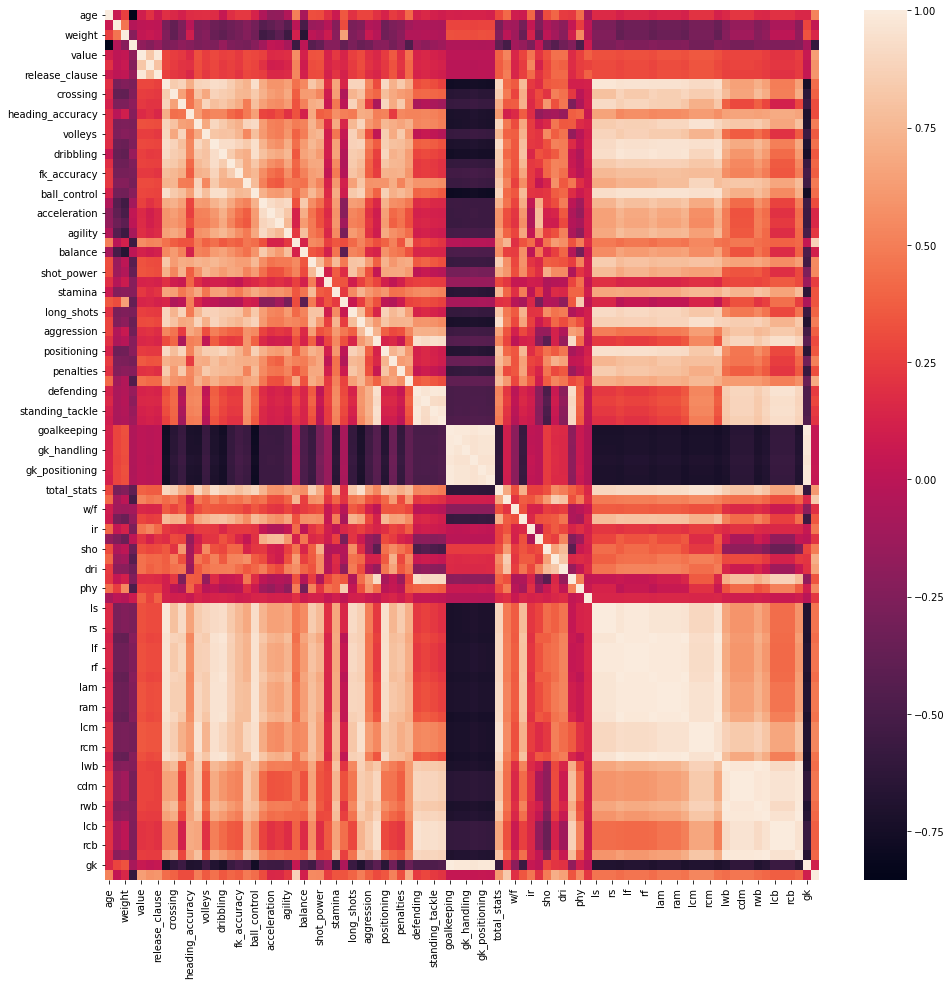

In [246]:
f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(numcorr)
plt.show()

In [247]:
# Para el modelo lineal 
# necesitamos variables con alta correlacion con la variable dependiente, mayor un umbral 0.5 
# y entre ellas baja correlacion 

# We want rows that have 

### Selecting variables with a correlation with OVA higher than 0.5%

In [248]:
ova_corr_limit = 0.5

In [ ]:
# For a li

In [277]:
correl = [(item[1], item[0]) for item in list(abs(numcorr['ova']).items())]
correl.sort(reverse=True)
correl

[(1.0, 'ova'),
 (0.8704635667947609, 'reactions'),
 (0.8342727844933118, 'base_stats'),
 (0.7034257710855812, 'pas'),
 (0.6933229511494163, 'composure'),
 (0.6466705344428552, 'dri'),
 (0.6329545014707084, 'value'),
 (0.6097927678216345, 'total_stats'),
 (0.5988533357132232, 'release_clause'),
 (0.596580985128582, 'growth'),
 (0.5806093929206396, 'wage'),
 (0.5486746077527331, 'power'),
 (0.542397932678866, 'phy'),
 (0.5397954009717523, 'shot_power'),
 (0.5296772668317551, 'rcm'),
 (0.5296772668317551, 'lcm'),
 (0.5296772668317551, 'cm'),
 (0.5195299285955483, 'age'),
 (0.5075838442646441, 'vision'),
 (0.4965166197330567, 'mentality'),
 (0.4933570262477734, 'short_passing'),
 (0.49211630902525444, 'sho'),
 (0.4794971656164065, 'long_passing'),
 (0.47267620654183884, 'ram'),
 (0.47267620654183884, 'lam'),
 (0.47267620654183884, 'cam'),
 (0.4648492823832325, 'ir'),
 (0.4641538775843341, 'rdm'),
 (0.4641538775843341, 'ldm'),
 (0.4641538775843341, 'cdm'),
 (0.4638773695940754, 'st'),
 (0.4

In [278]:
correl[:5]

[(1.0, 'ova'),
 (0.8704635667947609, 'reactions'),
 (0.8342727844933118, 'base_stats'),
 (0.7034257710855812, 'pas'),
 (0.6933229511494163, 'composure')]

In [249]:

ovaCorrFilter = numcorr[numcorr.ova >= ova_corr_limit]
filterdCorrCols = list(ovaCorrFilter.index)
filterdCorrCols
# ovaCorrFilter[filterdCorrCols]

['age',
 'value',
 'wage',
 'release_clause',
 'reactions',
 'power',
 'shot_power',
 'vision',
 'composure',
 'total_stats',
 'base_stats',
 'pas',
 'dri',
 'phy',
 'lcm',
 'cm',
 'rcm',
 'ova']

In [250]:
ovaCorrFilter = ovaCorrFilter[filterdCorrCols]
ovaCorrFilter

,age,value,wage,release_clause,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,lcm,cm,rcm,ova
age,1.000000,0.097112,0.199848,0.076509,0.504842,0.315195,0.307728,0.242917,0.414238,0.287849,0.417440,0.402296,0.242495,0.434456,0.207757,0.207757,0.207757,0.519530
value,0.097112,1.000000,0.820139,0.978750,0.559059,0.326920,0.333947,0.358396,0.443361,0.390281,0.527120,0.445148,0.443192,0.265323,0.354168,0.354168,0.354168,0.632955
wage,0.199848,0.820139,1.000000,0.798551,0.520894,0.307789,0.320898,0.332506,0.418322,0.368962,0.464830,0.411367,0.379233,0.250714,0.334825,0.334825,0.334825,0.580609
release_clause,0.076509,0.978750,0.798551,1.000000,0.529876,0.303231,0.309865,0.335761,0.419930,0.366361,0.496607,0.418713,0.416532,0.247801,0.334773,0.334773,0.334773,0.598853
reactions,0.504842,0.559059,0.520894,0.529876,1.000000,0.547866,0.515191,0.512561,0.681412,0.606721,0.745071,0.627475,0.571146,0.493809,0.540752,0.540752,0.540752,0.870464
power,0.315195,0.326920,0.307789,0.303231,0.547866,1.000000,0.765620,0.605072,0.699442,0.865023,0.574025,0.356433,0.332943,0.520818,0.802905,0.802905,0.802905,0.548675
shot_power,0.307728,0.333947,0.320898,0.309865,0.515191,0.765620,1.000000,0.675208,0.618460,0.698693,0.596391,0.555632,0.555851,0.211242,0.643593,0.643593,0.643593,0.539795
vision,0.242917,0.358396,0.332506,0.335761,0.512561,0.605072,0.675208,1.000000,0.660620,0.766896,0.627482,0.721312,0.656150,0.049441,0.788623,0.788623,0.788623,0.507584
composure,0.414238,0.443361,0.418322,0.419930,0.681412,0.699442,0.618460,0.660620,1.000000,0.779576,0.608858,0.531123,0.469703,0.353944,0.758944,0.758944,0.758944,0.693323
total_stats,0.287849,0.390281,0.368962,0.366361,0.606721,0.865023,0.698693,0.766896,0.779576,1.000000,0.678314,0.554473,0.494044,0.301586,0.962011,0.962011,0.962011,0.609793


In [251]:
ovaCorrFilter.shape

(18, 18)

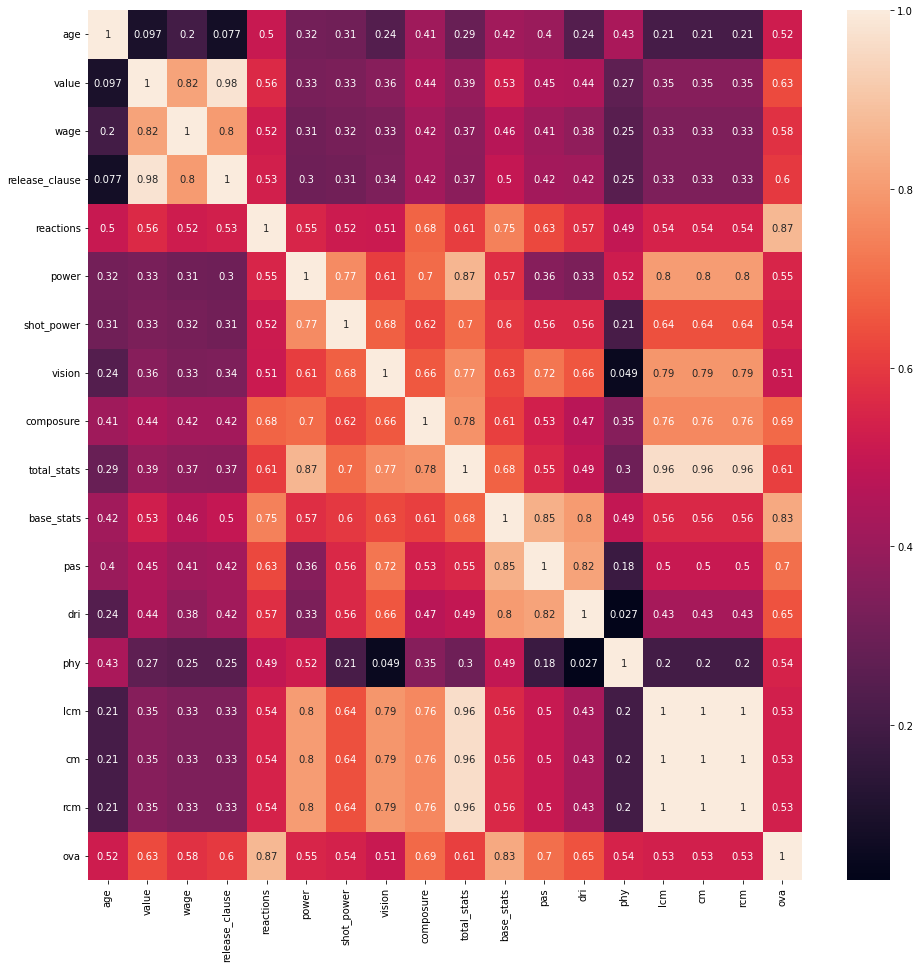

In [252]:
f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(ovaCorrFilter, annot=True)
plt.show()

### Multicolinearity analysis

In [253]:
# Analisis de multicolinearidad
# Seleccionar las variables que tienen alta correlacion entres ellas
# Umbral de correlacion entre ellas 0.8 --> the thresold of correlation is a around 0.7 - 0.75
# De entre ellas nos quedamos con las que tienen mayor correlacion con la variable dependiente ova


# if the correlations are lower than 0.6 better to choose another model

In [254]:
# Delete the columns from the df_nf data frame
# Features with low correlation with predict
df_nf = df_nf[filterdCorrCols]
df_nf.shape

(11694, 18)

In [255]:
# Drop features with high correlation between them
df_nf.drop(columns=['wage', 'release_clause','shot_power','lcm','cm','rcm', 'pas', 'dri'], inplace=True)
df_nf.head()

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,age,value,reactions,power,vision,composure,total_stats,base_stats,phy,ova
0,26,525000.0,66,306,68.0,54.0,1682,357,60,64
1,30,8500000.0,75,372,72.0,70.0,1961,412,71,77
2,33,9000000.0,78,308,78.0,82.0,1925,404,56,80
3,22,275000.0,55,277,54.0,48.0,1527,329,60,59
4,23,725000.0,62,280,64.0,58.0,1664,360,66,65


In [256]:
df_nf.shape

(11694, 10)

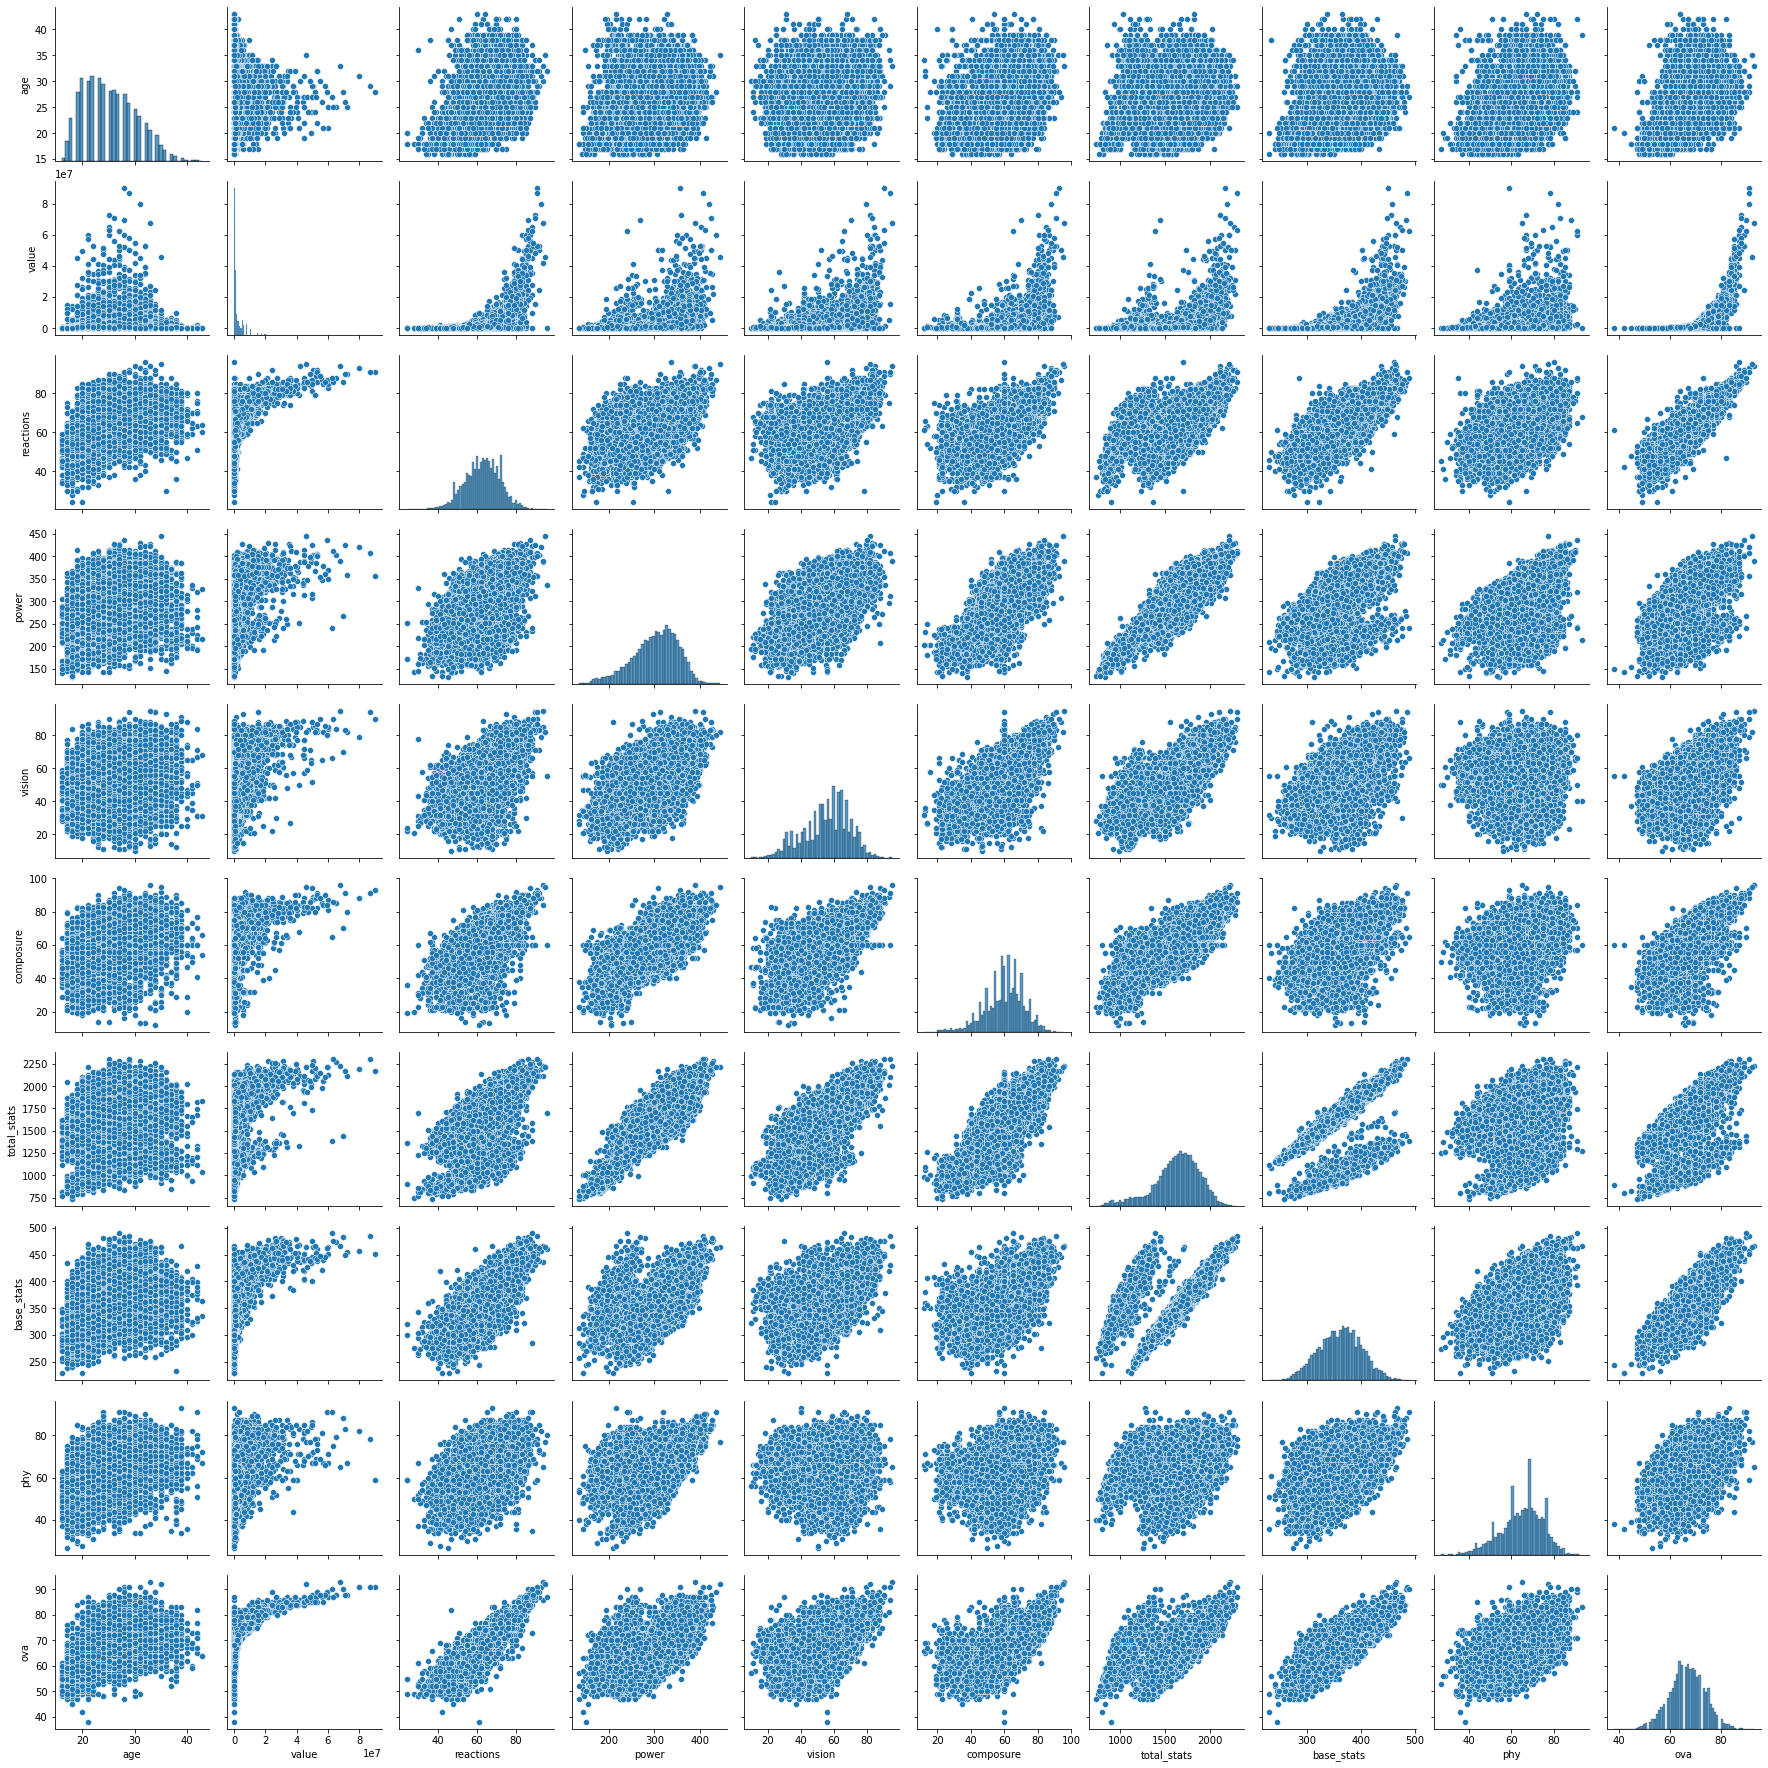

In [257]:
sns.pairplot(df_nf)
plt.show()

## Categorical features

In [258]:
df_cf = df.select_dtypes('object')
df_cf.head()

,nationality,club,bp,foot,a/w,d/w
0,Switzerland,FC Lausanne-Sport,CM,Right,High,Medium
1,China PR,Beijing Sinobo Guoan FC,ST,Right,High,Low
2,Italy,Al Hilal,CAM,Right,High,Medium
3,Wales,Swansea City,CDM,Right,Medium,Medium
4,France,US Orléans Loiret Football,CDM,Right,Low,Medium


In [259]:
cateCols = list(df_cf.columns)

In [260]:
cateCols

['nationality', 'club', 'bp', 'foot', 'a/w', 'd/w']

In [261]:
n_categories = {}
for c in cateCols:
    n_categories[c] = len(df_cf[c].value_counts())

n_categories

{'nationality': 159, 'club': 885, 'bp': 15, 'foot': 2, 'a/w': 3, 'd/w': 3}

## X-y split

In [306]:
y = df_nf['ova']
X = df_nf.drop(['ova'], axis=1)

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 1)

## Normalize X

In [308]:
# X normalize --> have the numbers in the same range
MinMaxtransformer = MinMaxScaler().fit(X_train)
x_normalized = MinMaxtransformer.transform(X_train)

In [309]:
x_train_normalized = pd.DataFrame(x_normalized,columns=X_train.columns)
x_test_normalized = pd.DataFrame(MinMaxtransformer.transform(X_test), columns=X_test.columns)
x_train_normalized.head()

,age,value,reactions,power,vision,composure,total_stats,base_stats,phy
0,0.111111,0.003056,0.527778,0.203947,0.329412,0.452381,0.211062,0.408560,0.409091
1,0.296296,0.038889,0.666667,0.562500,0.541176,0.654762,0.603942,0.486381,0.712121
2,0.444444,0.066667,0.680556,0.740132,0.658824,0.750000,0.726001,0.622568,0.681818
3,0.555556,0.010556,0.611111,0.756579,0.611765,0.607143,0.607756,0.521401,0.787879
4,0.185185,0.002556,0.333333,0.292763,0.552941,0.464286,0.431024,0.315175,0.242424


In [310]:
x_train_normalized.describe()

,age,value,reactions,power,vision,composure,total_stats,base_stats,phy
count,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000
mean,0.343461,0.028251,0.540158,0.555710,0.534087,0.570235,0.570413,0.517837,0.573199
std,0.183596,0.059437,0.125043,0.164503,0.161481,0.138547,0.166621,0.156482,0.147504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.004167,0.458333,0.453947,0.435294,0.488095,0.482835,0.408560,0.484848
50%,0.333333,0.008889,0.541667,0.575658,0.552941,0.571429,0.589320,0.521401,0.590909
75%,0.481481,0.026667,0.625000,0.677632,0.647059,0.666667,0.686586,0.626459,0.681818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
# Y normalize
# MinMaxtransformer = MinMaxScaler().fit(y_train)
#y_normalized = MinMaxtransformer.transform(y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[60. 72. 74. ... 72. 72. 72.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#y_normalized = pd.DataFrame(x_normalized,columns=X_train.columns)
#y_normalized.head()

In [ ]:
#y_normalized.describe()

## Split train and sample

In [266]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 1)

## Train the model

In [311]:
lm = linear_model.LinearRegression()
lm.fit(x_train_normalized,y_train)

LinearRegression()

### Score train

In [312]:
y_train_pred = lm.predict(x_train_normalized)
r2_score(y_train, y_train_pred)

0.8732004478562512

### Test prediction

In [313]:
y_test_pred = lm.predict(x_test_normalized)
r2_score(y_test, y_test_pred)

0.88492555777855

In [314]:
lm.intercept_

42.54847229122511

In [315]:
lm.coef_

array([ 3.83265522, 20.42116541, 20.33390267, -1.51976468, -3.5268781 ,
        7.98292789, -0.88815545, 16.88564048,  2.46287447])

### Root mean squared error

In [316]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

2.3579080352161945

In [ ]:
# How much data you need to have a better performance?

In [ ]:
# Life time of data make tests ... beyond the course... 

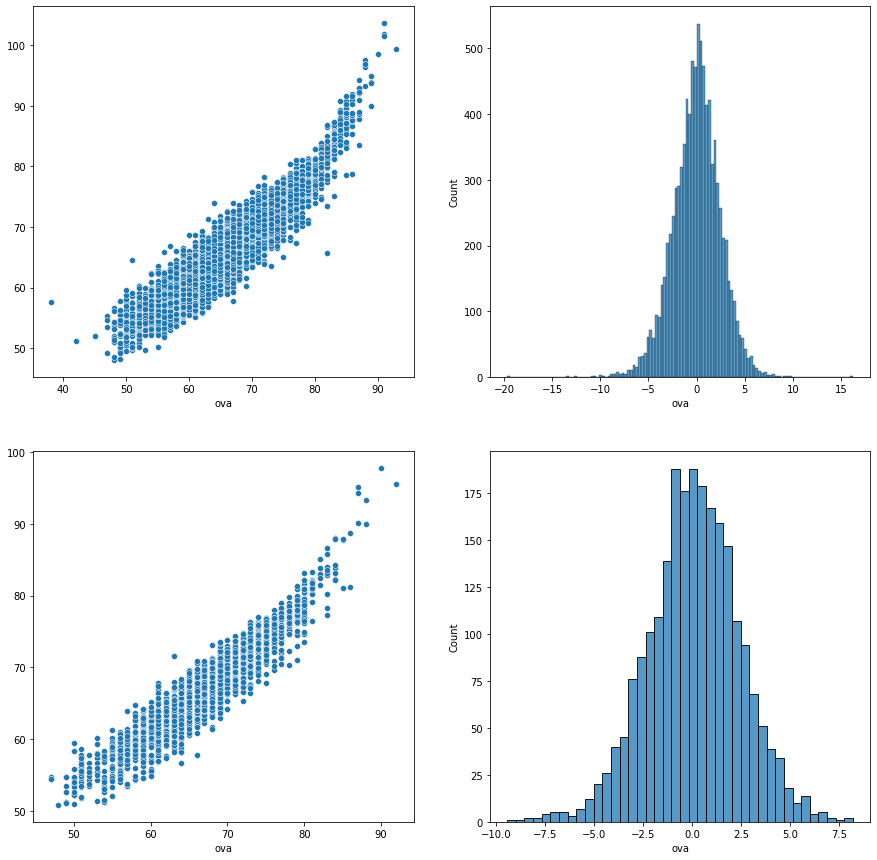

In [319]:
f, ax = plt.subplots(2,2, figsize = (15,15))
sns.scatterplot(y =y_train_pred, x =y_train, ax=ax[0,0])
sns.histplot(x=y_train - y_train_pred, ax=ax[0,1])
sns.scatterplot(y=y_test_pred, x=y_test, ax=ax[1,0])
sns.histplot(x=y_test - y_test_pred, ax=ax[1,1])
plt.show()

In [320]:
# ??? How can I find a register that has a wrong prediction?